In [15]:
%load_ext autoreload
%autoreload 2

from mlscratch.linear_regression import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# Reproducibility
rng = np.random.default_rng(1)
n_data = 20

# Data: y = 3x + 5 + noise
X = rng.uniform(-10, 10, size=n_data)
true_y = 3 * X + 5
noise = rng.normal(0.0, 3.0, size=n_data)
y = true_y + noise  # noisy targets

In [17]:
# Closed-form solution
lr_cf = LinearRegression()
lr_cf.fit_closed_form(X, y)
y_hat_cf = lr_cf.predict(X)
mse_cf = lr_cf.mse(y, y_hat_cf)

In [18]:
# Gradient descent solution
lr_gd = LinearRegression()
lr_gd.fit_gd(X, y, lr=1e-3, max_iter=5000, tol=1e-9, random_state=0)
y_hat_gd = lr_gd.predict(X)
mse_gd = lr_gd.mse(y, y_hat_gd)

In [19]:
print("Closed-form: coef_ =", lr_cf.coef_, "intercept_ =", lr_cf.intercept_, "MSE =", mse_cf)
print("Grad-Desc   : coef_ =", lr_gd.coef_, "intercept_ =", lr_gd.intercept_, "MSE =", mse_gd)

Closed-form: coef_ = [3.1775853] intercept_ = 5.033318518769947 MSE = 11.666808758129172
Grad-Desc   : coef_ = [3.17744248] intercept_ = 5.033214791549216 MSE = 11.666809326728684


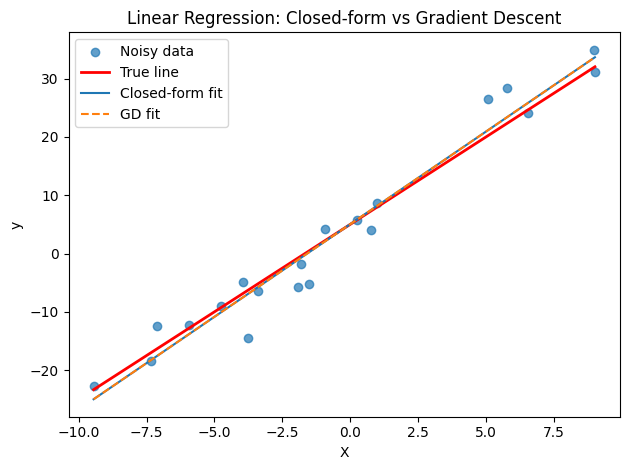

In [20]:
# Plot (use a sorted grid for smooth lines)
xs = np.linspace(X.min(), X.max(), 200)
cf_line = lr_cf.predict(xs)
gd_line = lr_gd.predict(xs)

plt.figure()
plt.scatter(X, y, label="Noisy data", alpha=0.7)
plt.plot(xs, 3*xs + 5, label="True line", linewidth=2, color='r')
plt.plot(xs, cf_line, label="Closed-form fit")
plt.plot(xs, gd_line, label="GD fit", linestyle="--")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Closed-form vs Gradient Descent")
plt.legend()
plt.tight_layout()
plt.show()